# Guided Project: Exploring eBay Car Sales Data

## 1. Introduction

In this guided project, we'll work with a dataset of used cars from eBay Kleinanzeigen, a [classifieds](https://en.wikipedia.org/wiki/Classified_advertising) section of the German eBay website.

The dataset was originally [scraped](https://en.wikipedia.org/wiki/Web_scraping) and uploaded to Kaggle by user [orgesleka](https://www.kaggle.com/orgesleka).

The original dataset isn't available on Kaggle anymore, but you can find it [here](https://data.world/data-society/used-cars-data).

We've made a few modifications from the original dataset:

* We sampled 50,000 data points from the full dataset, to ensure your code runs quickly in our hosted environment
* We dirtied the dataset a bit to more closely resemble what you would expect from a scraped dataset (the version uploaded to Kaggle was cleaned to be easier to work with)

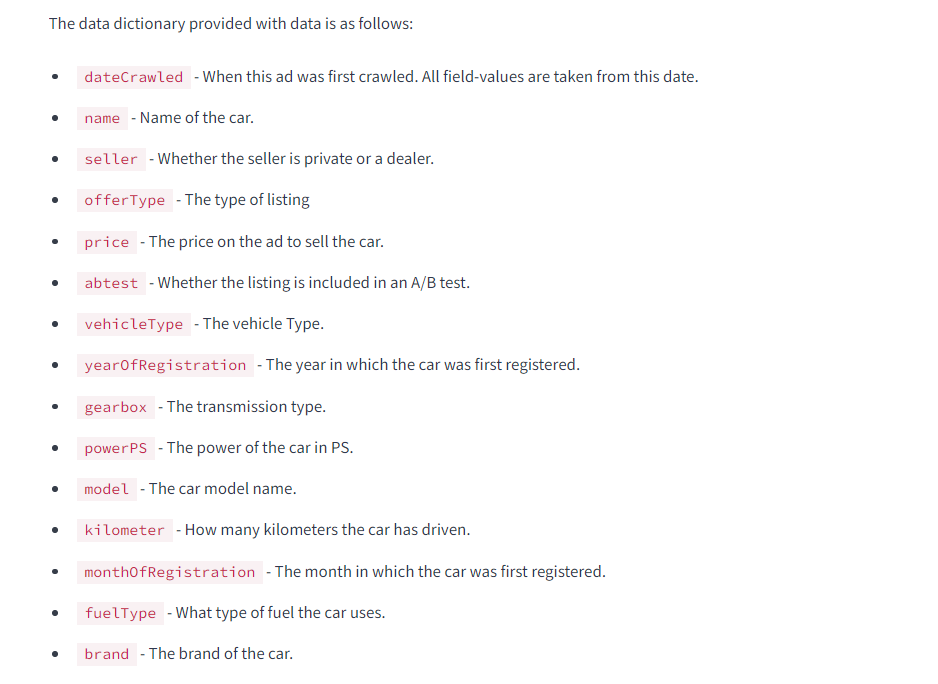

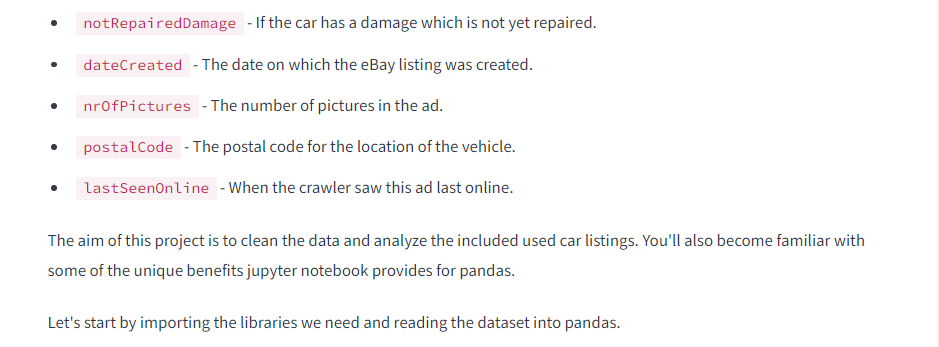

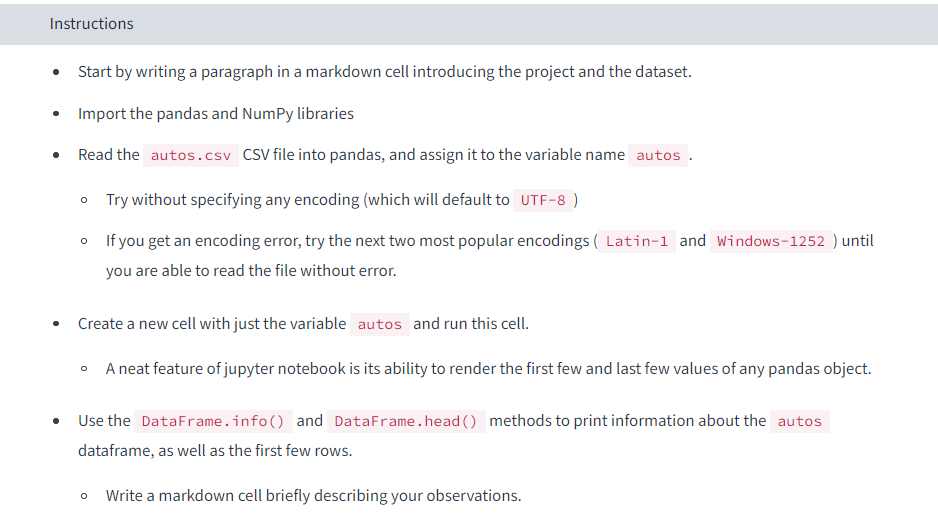

In [1]:
import numpy as np
import pandas as pd

autos = pd.read_csv('autos.csv', encoding='Latin-1')

In [2]:
autos

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2016-03-27 14:38:19,Audi_Q5_3.0_TDI_qu._S_tr.__Navi__Panorama__Xenon,privat,Angebot,"$24,900",control,limousine,2011,automatik,239,q5,"100,000km",1,diesel,audi,nein,2016-03-27 00:00:00,0,82131,2016-04-01 13:47:40
49996,2016-03-28 10:50:25,Opel_Astra_F_Cabrio_Bertone_Edition___TÜV_neu+...,privat,Angebot,"$1,980",control,cabrio,1996,manuell,75,astra,"150,000km",5,benzin,opel,nein,2016-03-28 00:00:00,0,44807,2016-04-02 14:18:02
49997,2016-04-02 14:44:48,Fiat_500_C_1.2_Dualogic_Lounge,privat,Angebot,"$13,200",test,cabrio,2014,automatik,69,500,"5,000km",11,benzin,fiat,nein,2016-04-02 00:00:00,0,73430,2016-04-04 11:47:27
49998,2016-03-08 19:25:42,Audi_A3_2.0_TDI_Sportback_Ambition,privat,Angebot,"$22,900",control,kombi,2013,manuell,150,a3,"40,000km",11,diesel,audi,nein,2016-03-08 00:00:00,0,35683,2016-04-05 16:45:07


In [3]:
autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


In [4]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50000 non-null  object
 1   name                 50000 non-null  object
 2   seller               50000 non-null  object
 3   offerType            50000 non-null  object
 4   price                50000 non-null  object
 5   abtest               50000 non-null  object
 6   vehicleType          44905 non-null  object
 7   yearOfRegistration   50000 non-null  int64 
 8   gearbox              47320 non-null  object
 9   powerPS              50000 non-null  int64 
 10  model                47242 non-null  object
 11  odometer             50000 non-null  object
 12  monthOfRegistration  50000 non-null  int64 
 13  fuelType             45518 non-null  object
 14  brand                50000 non-null  object
 15  notRepairedDamage    40171 non-null  object
 16  date

## 2. Cleaning Column Names

From the work we did in the last screen, we can make the following observations:

* The dataset contains 20 columns, most of which are strings.

* Some columns have null values, but none have more than ~20% null values.

* The column names use [camelcase](https://en.wikipedia.org/wiki/Camel_case) instead of Python's preferred [snakecase](https://en.wikipedia.org/wiki/Snake_case), which means we can't just replace spaces with underscores.


Let's convert the column names from camelcase to snakecase and reword some of the column names based on the data dictionary to be more descriptive.

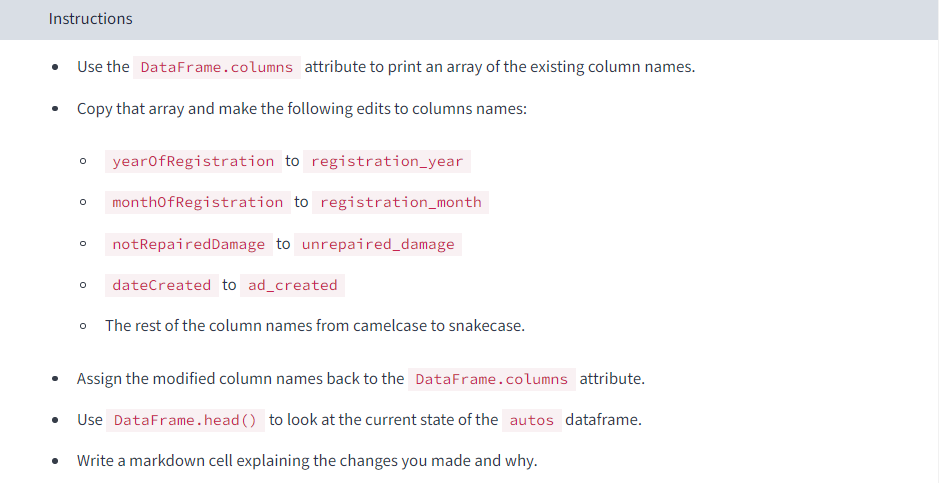

In [5]:
columns = autos.columns
columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'odometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [6]:
snake_case_columns = {
    "dateCrawled":"date_crawled",
    "name":"name",
    "seller":"seller",
    "offerType":"offer_type",
    "price":"price",
    "abtest":"abtest",
    "vehicleType":"vehicle_type",
    "yearOfRegistration":"registration_year",
    "gearbox":"gearbox",
    "powerPS":"power_ps",
    "model":"model",
    "odometer":"odometer",
    "monthOfRegistration":"registration_month",
    "fuelType":"fuel_type",
    "brand":"brand",
    "notRepairedDamage":"unrepaired_damage",
    "dateCreated":"ad_created",
    "nrOfPictures":"nr_of_pictures",
    "postalCode":"postal_code",
    "lastSeen":"last_seen",
}
snake_case_columns

{'dateCrawled': 'date_crawled',
 'name': 'name',
 'seller': 'seller',
 'offerType': 'offer_type',
 'price': 'price',
 'abtest': 'abtest',
 'vehicleType': 'vehicle_type',
 'yearOfRegistration': 'registration_year',
 'gearbox': 'gearbox',
 'powerPS': 'power_ps',
 'model': 'model',
 'odometer': 'odometer',
 'monthOfRegistration': 'registration_month',
 'fuelType': 'fuel_type',
 'brand': 'brand',
 'notRepairedDamage': 'unrepaired_damage',
 'dateCreated': 'ad_created',
 'nrOfPictures': 'nr_of_pictures',
 'postalCode': 'postal_code',
 'lastSeen': 'last_seen'}

In [7]:
autos.columns = columns.map(snake_case_columns)
autos.columns

Index(['date_crawled', 'name', 'seller', 'offer_type', 'price', 'abtest',
       'vehicle_type', 'registration_year', 'gearbox', 'power_ps', 'model',
       'odometer', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'nr_of_pictures', 'postal_code',
       'last_seen'],
      dtype='object')

In [8]:
autos.head()

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


## 3. Initial Exploration and Cleaning.

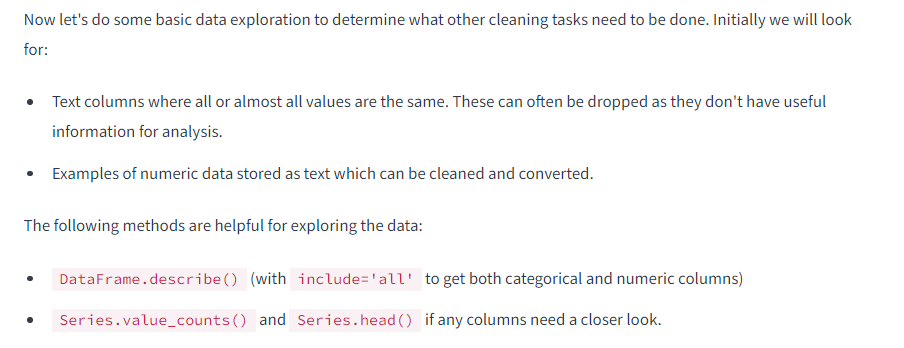

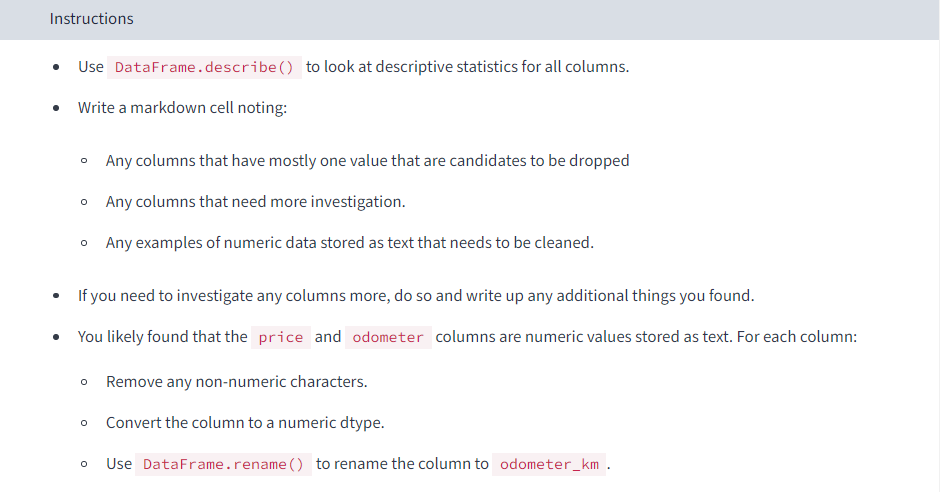

In [9]:
autos.describe(include='all')

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-04-02 11:37:04,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


Columns such as seller, offer_type, unrepaired_damage & nr_of_pictures can be dropped because they mostly contains only one type of values.

In [10]:
price = autos["price"]
price.unique()

array(['$5,000', '$8,500', '$8,990', ..., '$385', '$22,200', '$16,995'],
      dtype=object)

In [11]:
price = price.str.replace("$","",regex=False)
price = price.str.replace(",","",regex=False)
price.head()

0    5000
1    8500
2    8990
3    4350
4    1350
Name: price, dtype: object

In [12]:
price=price.astype(int)
price.head()

0    5000
1    8500
2    8990
3    4350
4    1350
Name: price, dtype: int32

In [13]:
autos["price"] = price
autos['price']

0         5000
1         8500
2         8990
3         4350
4         1350
         ...  
49995    24900
49996     1980
49997    13200
49998    22900
49999     1250
Name: price, Length: 50000, dtype: int32

In [14]:
odometer = autos['odometer']
odometer

0        150,000km
1        150,000km
2         70,000km
3         70,000km
4        150,000km
           ...    
49995    100,000km
49996    150,000km
49997      5,000km
49998     40,000km
49999    150,000km
Name: odometer, Length: 50000, dtype: object

In [15]:
odometer = odometer.str.replace("km","")
odometer = odometer.str.replace(",","", regex=False)
odometer.head()

0    150000
1    150000
2     70000
3     70000
4    150000
Name: odometer, dtype: object

In [16]:
odometer = odometer.astype(int)
odometer.head()

0    150000
1    150000
2     70000
3     70000
4    150000
Name: odometer, dtype: int32

In [17]:
autos["odometer"] = odometer
autos.head()

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,5000,control,bus,2004,manuell,158,andere,150000,3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,8500,control,limousine,1997,automatik,286,7er,150000,6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,8990,test,limousine,2009,manuell,102,golf,70000,7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,4350,control,kleinwagen,2007,automatik,71,fortwo,70000,6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,1350,test,kombi,2003,manuell,0,focus,150000,7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


In [18]:
autos = autos.rename({'odometer':'odometer_km'}, axis=1)
autos.head()

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,5000,control,bus,2004,manuell,158,andere,150000,3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,8500,control,limousine,1997,automatik,286,7er,150000,6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,8990,test,limousine,2009,manuell,102,golf,70000,7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,4350,control,kleinwagen,2007,automatik,71,fortwo,70000,6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,1350,test,kombi,2003,manuell,0,focus,150000,7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


In [19]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   date_crawled        50000 non-null  object
 1   name                50000 non-null  object
 2   seller              50000 non-null  object
 3   offer_type          50000 non-null  object
 4   price               50000 non-null  int32 
 5   abtest              50000 non-null  object
 6   vehicle_type        44905 non-null  object
 7   registration_year   50000 non-null  int64 
 8   gearbox             47320 non-null  object
 9   power_ps            50000 non-null  int64 
 10  model               47242 non-null  object
 11  odometer_km         50000 non-null  int32 
 12  registration_month  50000 non-null  int64 
 13  fuel_type           45518 non-null  object
 14  brand               50000 non-null  object
 15  unrepaired_damage   40171 non-null  object
 16  ad_created          50

Notice that price & odometer_km column has changed to int type, which was previously of object type (i.e. String)

## 4. Exploring the Odometer and Price Columns

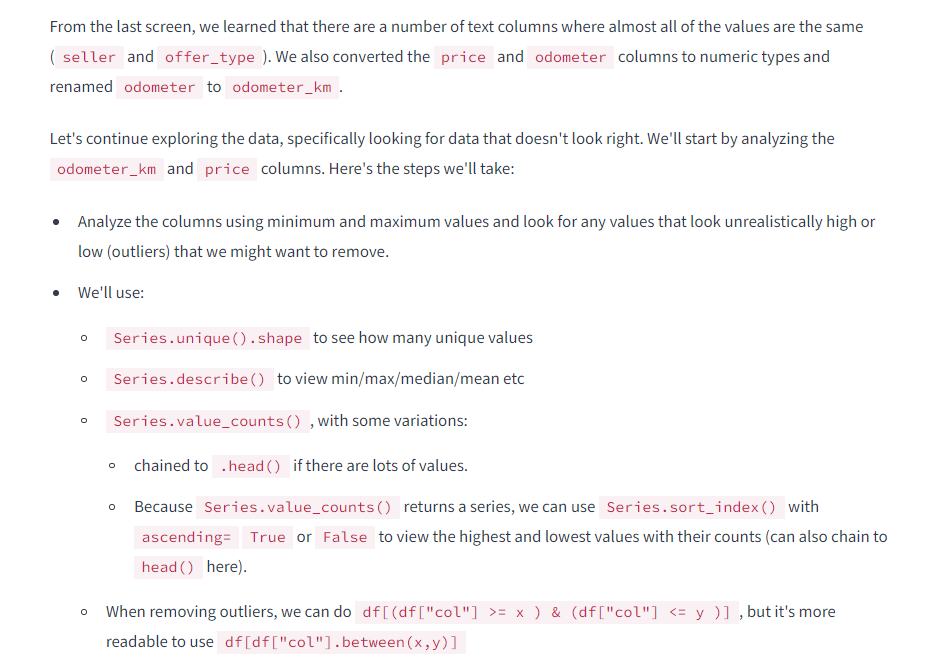

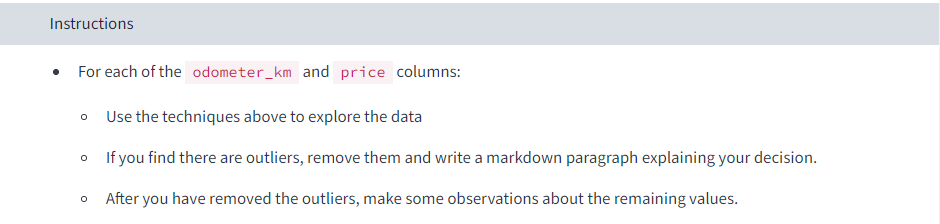

In [20]:
odometer = autos["odometer_km"]
price = autos["price"]

In [21]:
odometer.unique()

array([150000,  70000,  50000,  80000,  10000,  30000, 125000,  90000,
        20000,  60000,   5000, 100000,  40000])

In [22]:
odometer.describe()

count     50000.000000
mean     125732.700000
std       40042.211706
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: odometer_km, dtype: float64

In [23]:
odometer.value_counts(ascending=True).sort_index(ascending=True)

5000        967
10000       264
20000       784
30000       789
40000       819
50000      1027
60000      1164
70000      1230
80000      1436
90000      1757
100000     2169
125000     5170
150000    32424
Name: odometer_km, dtype: int64

In [24]:
price.unique()

array([ 5000,  8500,  8990, ...,   385, 22200, 16995])

In [25]:
price.describe()

count    5.000000e+04
mean     9.840044e+03
std      4.811044e+05
min      0.000000e+00
25%      1.100000e+03
50%      2.950000e+03
75%      7.200000e+03
max      1.000000e+08
Name: price, dtype: float64

In [26]:
price.value_counts(ascending=True).sort_index(ascending=True)

0           1421
1            156
2              3
3              1
5              2
            ... 
10000000       1
11111111       2
12345678       3
27322222       1
99999999       1
Name: price, Length: 2357, dtype: int64

## 5. Exploring the date columns

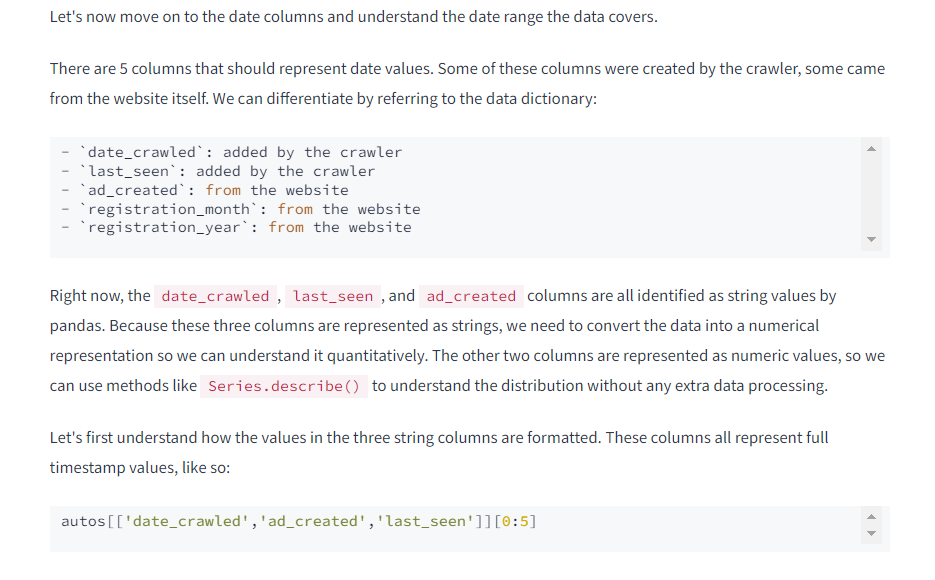

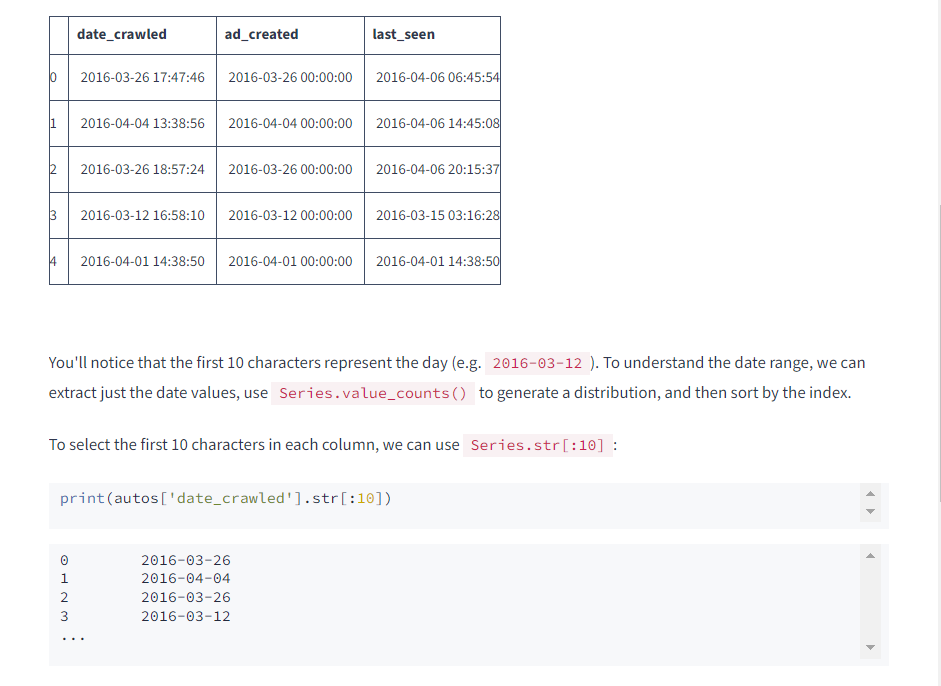

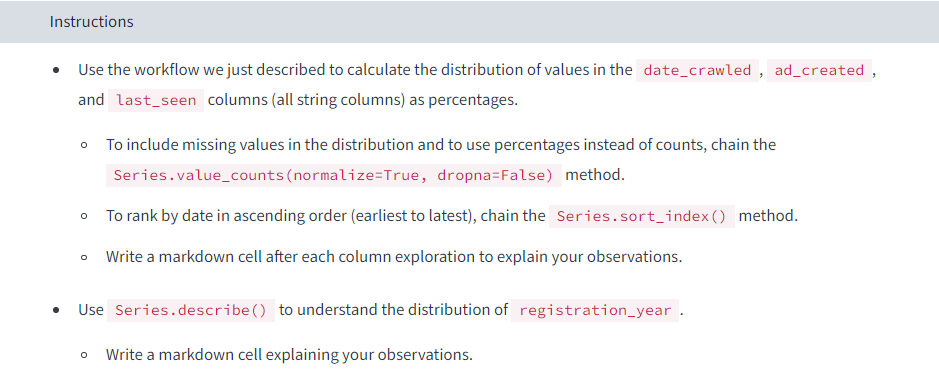

In [27]:
autos["date_crawled"].value_counts(normalize=True, dropna=False).sort_index()

2016-03-05 14:06:30    0.00002
2016-03-05 14:06:40    0.00002
2016-03-05 14:07:04    0.00002
2016-03-05 14:07:08    0.00002
2016-03-05 14:07:21    0.00002
                        ...   
2016-04-07 14:30:09    0.00002
2016-04-07 14:30:26    0.00002
2016-04-07 14:36:44    0.00002
2016-04-07 14:36:55    0.00002
2016-04-07 14:36:56    0.00002
Name: date_crawled, Length: 48213, dtype: float64

In [28]:
autos["ad_created"].value_counts(normalize=True, dropna=False).sort_index()

2015-06-11 00:00:00    0.00002
2015-08-10 00:00:00    0.00002
2015-09-09 00:00:00    0.00002
2015-11-10 00:00:00    0.00002
2015-12-05 00:00:00    0.00002
                        ...   
2016-04-03 00:00:00    0.03892
2016-04-04 00:00:00    0.03688
2016-04-05 00:00:00    0.01184
2016-04-06 00:00:00    0.00326
2016-04-07 00:00:00    0.00128
Name: ad_created, Length: 76, dtype: float64

In [29]:
autos["last_seen"].value_counts(normalize=True, dropna=False).sort_index()

2016-03-05 14:45:46    0.00002
2016-03-05 14:46:02    0.00002
2016-03-05 14:49:34    0.00002
2016-03-05 15:16:11    0.00002
2016-03-05 15:16:47    0.00002
                        ...   
2016-04-07 14:58:44    0.00006
2016-04-07 14:58:45    0.00002
2016-04-07 14:58:46    0.00002
2016-04-07 14:58:48    0.00006
2016-04-07 14:58:50    0.00008
Name: last_seen, Length: 39481, dtype: float64

In [30]:
autos["registration_year"].describe()

count    50000.000000
mean      2005.073280
std        105.712813
min       1000.000000
25%       1999.000000
50%       2003.000000
75%       2008.000000
max       9999.000000
Name: registration_year, dtype: float64

## 6. Dealing with Incorrect Registration Year Data

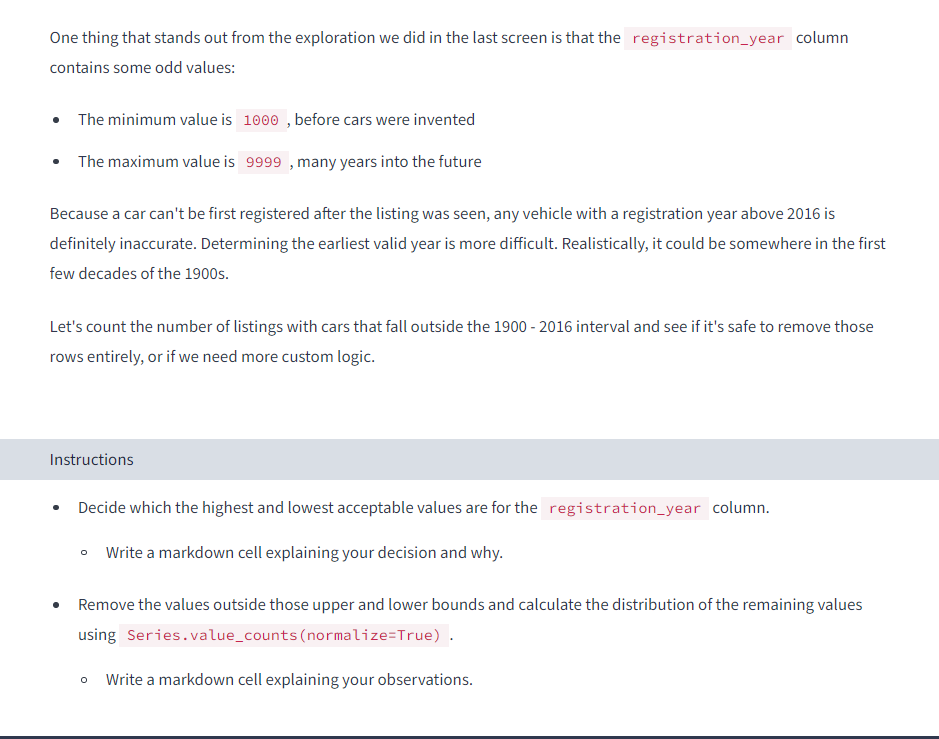

In [31]:
autos["registration_year"].value_counts(normalize=True).sort_index()

1000    0.00002
1001    0.00002
1111    0.00002
1500    0.00002
1800    0.00004
         ...   
6200    0.00002
8888    0.00002
9000    0.00004
9996    0.00002
9999    0.00008
Name: registration_year, Length: 97, dtype: float64

In [32]:
reg_bool = ((autos["registration_year"]>= 1900) & (autos["registration_year"]<=2016))
autos.loc[reg_bool, "registration_year" ]

0        2004
1        1997
2        2009
3        2007
4        2003
         ... 
49995    2011
49996    1996
49997    2014
49998    2013
49999    1996
Name: registration_year, Length: 48028, dtype: int64

In [33]:
autos = autos.loc[reg_bool]
autos.head()

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,5000,control,bus,2004,manuell,158,andere,150000,3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,8500,control,limousine,1997,automatik,286,7er,150000,6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,8990,test,limousine,2009,manuell,102,golf,70000,7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,4350,control,kleinwagen,2007,automatik,71,fortwo,70000,6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,1350,test,kombi,2003,manuell,0,focus,150000,7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


In [34]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48028 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   date_crawled        48028 non-null  object
 1   name                48028 non-null  object
 2   seller              48028 non-null  object
 3   offer_type          48028 non-null  object
 4   price               48028 non-null  int32 
 5   abtest              48028 non-null  object
 6   vehicle_type        44903 non-null  object
 7   registration_year   48028 non-null  int64 
 8   gearbox             45604 non-null  object
 9   power_ps            48028 non-null  int64 
 10  model               45560 non-null  object
 11  odometer_km         48028 non-null  int32 
 12  registration_month  48028 non-null  int64 
 13  fuel_type           44301 non-null  object
 14  brand               48028 non-null  object
 15  unrepaired_damage   39040 non-null  object
 16  ad_created          48

In [35]:
autos["registration_year"].value_counts(normalize=True).sort_index()

1910    0.000187
1927    0.000021
1929    0.000021
1931    0.000021
1934    0.000042
          ...   
2012    0.027546
2013    0.016782
2014    0.013867
2015    0.008308
2016    0.027401
Name: registration_year, Length: 78, dtype: float64

## 7. Exploring Price by Brand

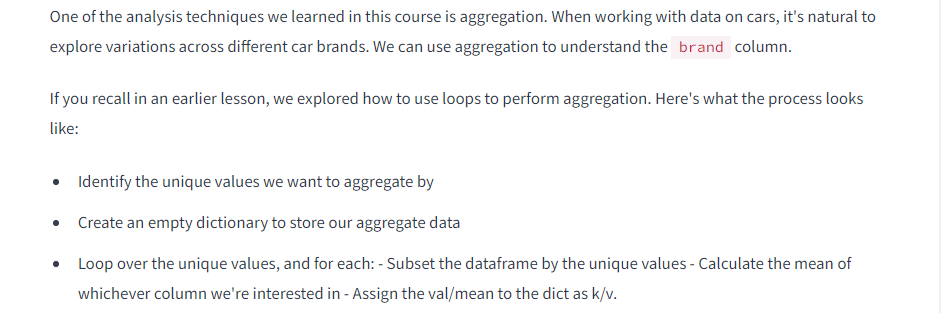

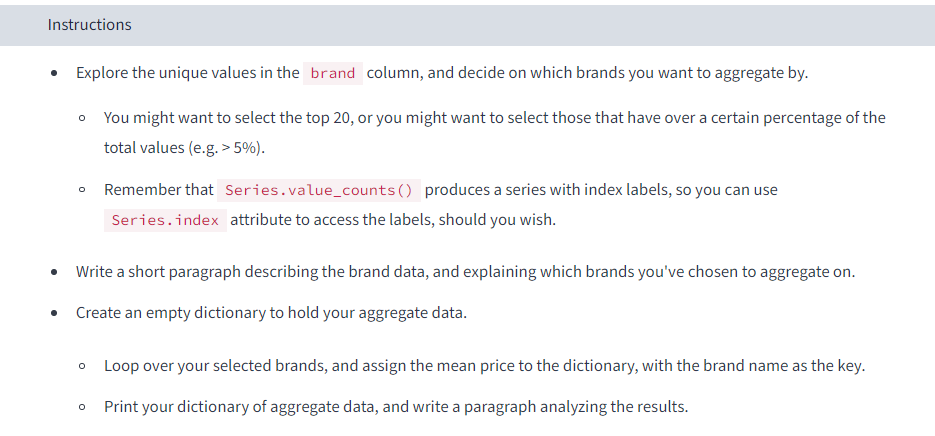

In [36]:
autos["brand"].unique()

array(['peugeot', 'bmw', 'volkswagen', 'smart', 'ford', 'chrysler',
       'seat', 'renault', 'mercedes_benz', 'audi', 'sonstige_autos',
       'opel', 'mazda', 'porsche', 'mini', 'toyota', 'dacia', 'nissan',
       'jeep', 'saab', 'volvo', 'mitsubishi', 'jaguar', 'fiat', 'skoda',
       'subaru', 'kia', 'citroen', 'chevrolet', 'hyundai', 'honda',
       'daewoo', 'suzuki', 'trabant', 'land_rover', 'alfa_romeo', 'lada',
       'rover', 'daihatsu', 'lancia'], dtype=object)

In [37]:
autos["brand"].value_counts()

volkswagen        10188
bmw                5284
opel               5195
mercedes_benz      4580
audi               4149
ford               3352
renault            2274
peugeot            1418
fiat               1242
seat                873
skoda               770
mazda               727
nissan              725
citroen             669
smart               668
toyota              599
sonstige_autos      526
hyundai             473
volvo               444
mini                415
mitsubishi          391
honda               377
kia                 341
alfa_romeo          318
porsche             293
suzuki              284
chevrolet           274
chrysler            176
daihatsu            123
dacia               123
jeep                108
subaru              105
land_rover           98
saab                 77
jaguar               76
trabant              75
daewoo               72
rover                65
lancia               52
lada                 29
Name: brand, dtype: int64

In [59]:
brand_avg={}
unique_brands = autos["brand"].unique()
#print(unique_brands)
#bool_price = autos["brand"]=="suzuki"
#print(bool_price)
#print(autos.loc[bool_price,"price"].sum())
#print(autos.loc[bool_price,"price"].shape[0])

for brand in unique_brands: 
    bool_price = autos["brand"]==brand
    total_price = autos.loc[bool_price,"price"].sum()
    counts = autos.loc[bool_price,"price"].shape[0]
    #print(str(brand) + "-"+str(total_price)+"="+str(counts))
    mean =total_price / counts
    brand_avg[brand] = mean
print("**************")
for key in sorted(brand_avg, key=brand_avg.get, reverse=True):
    print(str(key) + " : " + str(brand_avg[key]))

**************
porsche : 44553.46757679181
citroen : 44534.79671150971
sonstige_autos : 39621.77946768061
mercedes_benz : 30317.447816593885
land_rover : 19108.091836734693
jeep : 11434.75
jaguar : 11176.197368421053
mini : 10460.012048192772
audi : 9093.65003615329
bmw : 8334.645155185466
ford : 7263.015811455847
volkswagen : 6516.457597173145
chevrolet : 6488.981751824817
skoda : 6334.91948051948
dacia : 5915.528455284553
kia : 5789.351906158357
hyundai : 5308.53911205074
opel : 5252.61655437921
toyota : 5115.33388981636
volvo : 4757.108108108108
nissan : 4664.891034482758
seat : 4296.492554410081
mazda : 4010.7716643741405
suzuki : 3995.757042253521
honda : 3988.0
alfa_romeo : 3984.85534591195
subaru : 3765.038095238095
smart : 3542.706586826347
mitsubishi : 3333.8005115089513
lancia : 3246.3653846153848
chrysler : 3229.443181818182
saab : 3211.6493506493507
peugeot : 3039.4682651622
fiat : 2711.8011272141707
lada : 2502.896551724138
renault : 2395.4164467897976
daihatsu : 1556.3821

## 8. Storing Aggregate Data in a DataFrame

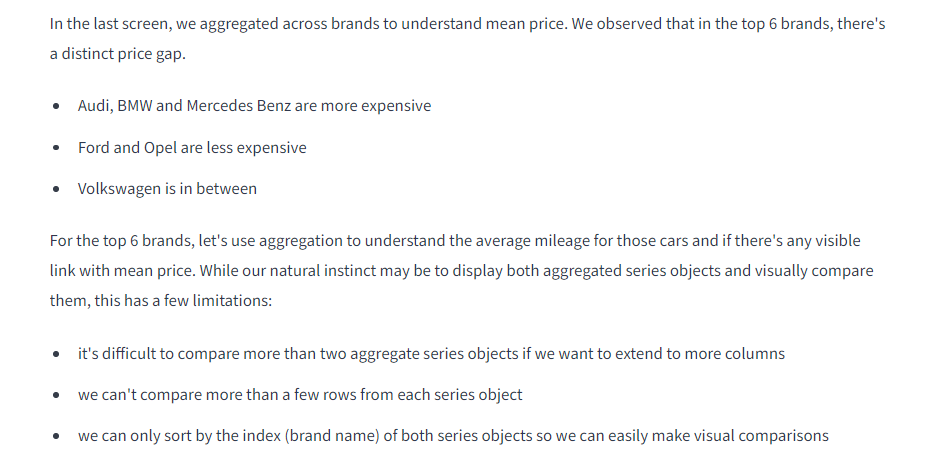

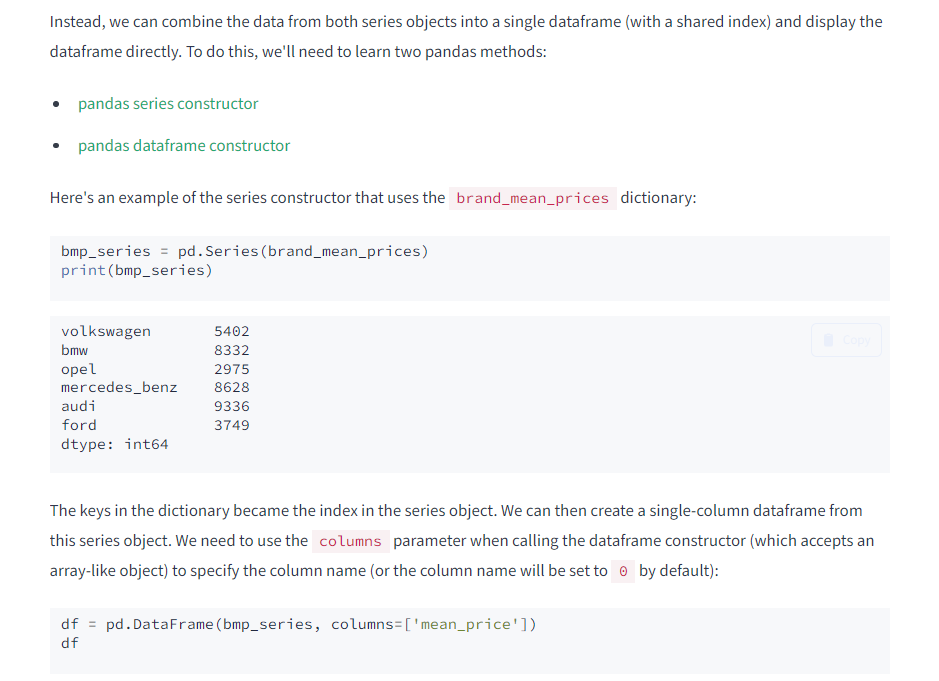

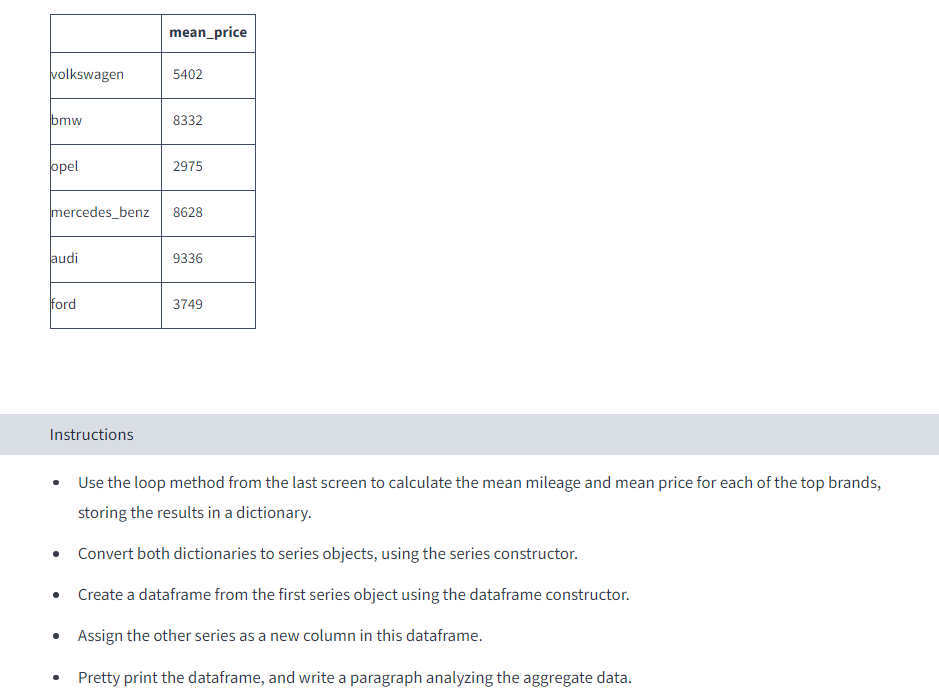

In [62]:
mean_price={}
mean_mileage = {}

unique_brands = autos["brand"].unique()


for brand in unique_brands: 
    bool_brand = autos["brand"]==brand
    total_price = autos.loc[bool_brand,"price"].sum()
    total_mileage = autos.loc[bool_brand,"odometer_km"].sum()
    counts = autos.loc[bool_brand,"price"].shape[0]    
    meanPrice =total_price / counts
    meanMileage = total_mileage / counts
    mean_price[brand] = meanPrice
    mean_mileage[brand] = meanMileage

bmp_series = pd.Series(mean_price)
bmm_series = pd.Series(mean_mileage)
    
price_mileage_comp_df = pd.DataFrame(bmp_series, columns=['MEAN PRICE'])
price_mileage_comp_df["MEAN_MILEAGE"] = bmm_series

print(price_mileage_comp_df.sort_values(by=['MEAN PRICE'], ascending=False))

                  MEAN PRICE   MEAN_MILEAGE
porsche         44553.467577   97457.337884
citroen         44534.796712  119461.883408
sonstige_autos  39621.779468   87262.357414
mercedes_benz   30317.447817  130860.262009
land_rover      19108.091837  118010.204082
jeep            11434.750000  127546.296296
jaguar          11176.197368  120921.052632
mini            10460.012048   88602.409639
audi             9093.650036  129287.780188
bmw              8334.645155  132434.708554
ford             7263.015811  124046.837709
volkswagen       6516.457597  128730.369062
chevrolet        6488.981752   99251.824818
skoda            6334.919481  110954.545455
dacia            5915.528455   84268.292683
kia              5789.351906  112434.017595
hyundai          5308.539112  106511.627907
opel             5252.616554  129227.141482
toyota           5115.333890  115709.515860
volvo            4757.108108  138355.855856
nissan           4664.891034  118572.413793
seat             4296.492554  12

## 9. Next Steps

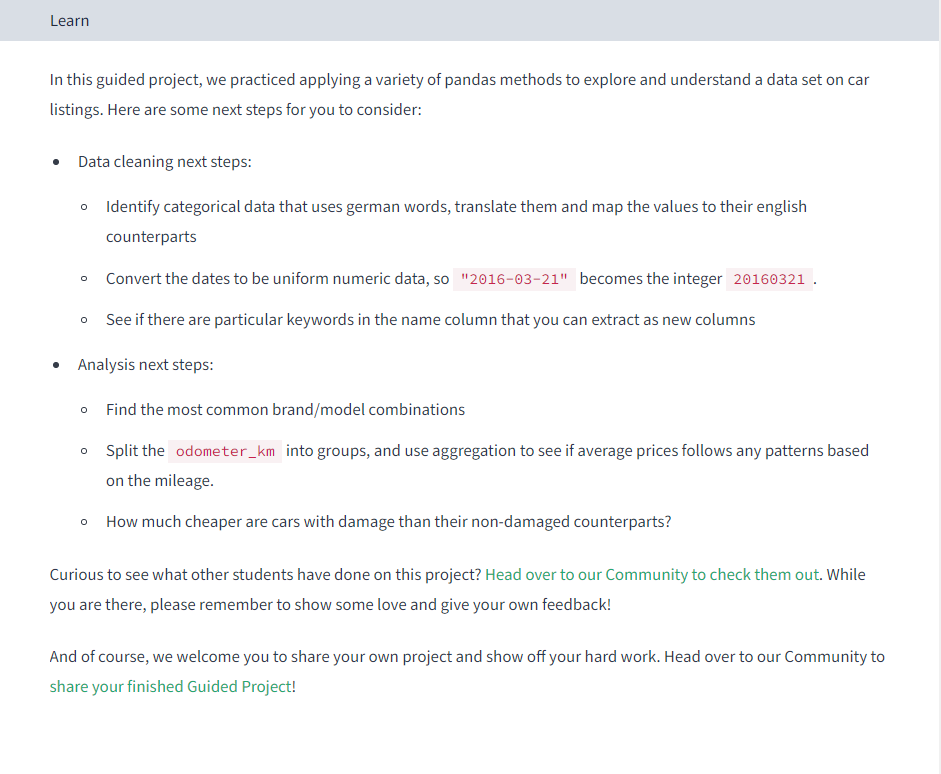

[ Head over to our Community to check them out.](https://community.dataquest.io/tags/c/social/share/49/294)